## Spotify Data Analysis: What Makes a Song Popular?  
## Research Question:
This project aims to answer: **What factors contribute to a song’s popularity on Spotify?**
We will analyze **tempo, energy, danceability, and loudness** to determine their impact on popularity.


In [3]:
import pandas as pd
df = pd.read_csv("high_popularity_spotify_data.csv")

# Top 5 Songs Based on Popularity

In [4]:
df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


# Generate Descriptive Statistics

In [5]:
df.describe()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.667216,121.070938,0.650362,-6.704131,0.171579,0.525737,3.950178,0.100926,75.806050,0.041520,0.578292,5.338078,214562.125741,0.221220
std,0.184908,27.066029,0.157721,3.377068,0.123953,0.236113,0.326673,0.099748,6.032532,0.156556,0.493979,3.608208,58310.747929,0.250593
min,0.001610,49.305000,0.136000,-43.643000,0.021000,0.034800,1.000000,0.023200,68.000000,0.000000,0.000000,0.000000,61673.000000,0.000013
25%,0.551000,100.058750,0.543250,-7.950250,0.093400,0.339000,4.000000,0.037900,71.000000,0.000000,0.000000,2.000000,176607.750000,0.023050
50%,0.689000,120.001000,0.664500,-5.974500,0.121000,0.528000,4.000000,0.058100,75.000000,0.000006,1.000000,5.000000,211180.000000,0.124000
75%,0.807000,136.833500,0.769000,-4.687250,0.210000,0.720000,4.000000,0.118000,79.000000,0.000814,1.000000,8.000000,244993.250000,0.334750
max,0.990000,209.688000,0.979000,1.295000,0.950000,0.978000,5.000000,0.848000,100.000000,0.971000,1.000000,11.000000,547107.000000,0.995000


In [6]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


# Concise Summary of Dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

In [30]:
print(df.columns.tolist())

['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness', 'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness', 'track_popularity', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'instrumentalness', 'track_album_id', 'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre', 'type', 'playlist_id']


# Histogram Showing Popularity Distribution

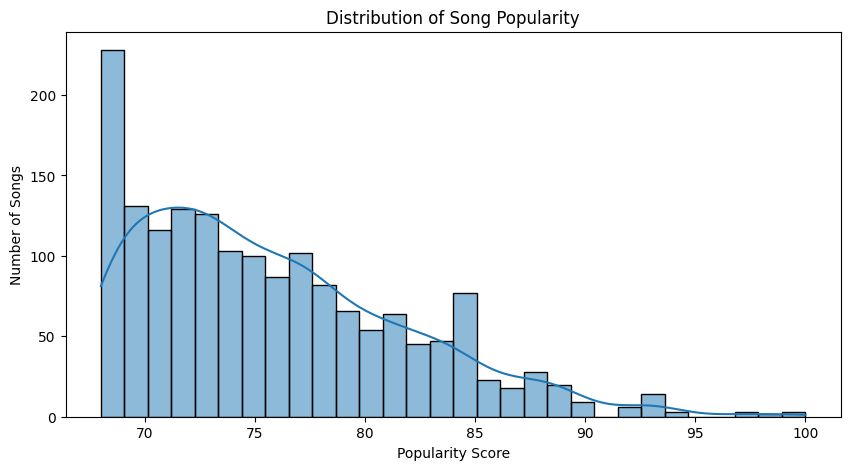

In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv("high_popularity_spotify_data.csv")  # Ensure this filename matches your actual file

# Now, try the histogram again
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['track_popularity'], bins=30, kde=True)  # kde=True adds a smooth curve
plt.title("Distribution of Song Popularity")  # Add a title
plt.xlabel("Popularity Score")  # Label for X-axis
plt.ylabel("Number of Songs")  # Label for Y-axis
plt.show()

# Popularity in Top 10 Songs 

In [19]:
df.nlargest(10, 'track_popularity')[['track_name', 'track_artist', 'track_popularity']]


,track_name,track_artist,track_popularity
0,Die With A Smile,"Lady Gaga, Bruno Mars",100
455,Die With A Smile,"Lady Gaga, Bruno Mars",100
676,Die With A Smile,"Lady Gaga, Bruno Mars",100
4,APT.,"ROSÉ, Bruno Mars",98
677,APT.,"ROSÉ, Bruno Mars",98
1,BIRDS OF A FEATHER,Billie Eilish,97
456,BIRDS OF A FEATHER,Billie Eilish,97
678,BIRDS OF A FEATHER,Billie Eilish,97
5,"Good Luck, Babe!",Chappell Roan,94
457,"Good Luck, Babe!",Chappell Roan,94


# Popularity of Genres 

/var/folders/sr/dvw4ncx5557fybkrrxhlspcr0000gn/T/ipykernel_29863/234960381.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette="viridis")


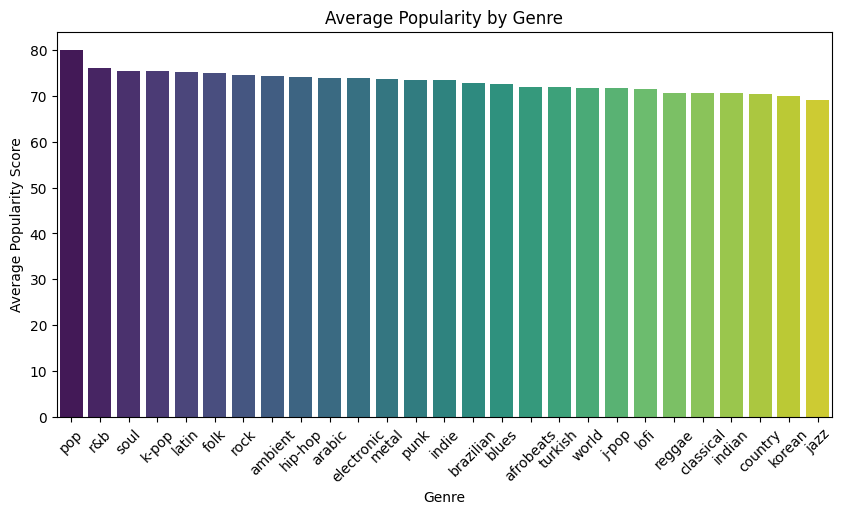

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove "Gaming" from the dataset
df_filtered = df[df["playlist_genre"] != "gaming"]

# Group by genre and calculate average popularity
genre_popularity = df_filtered.groupby("playlist_genre")["track_popularity"].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette="viridis")

# Add titles and labels
plt.title("Average Popularity by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Popularity Score")
plt.xticks(rotation=45)  # Rotate labels for better visibility

plt.show()

# Popularity Based on Energy

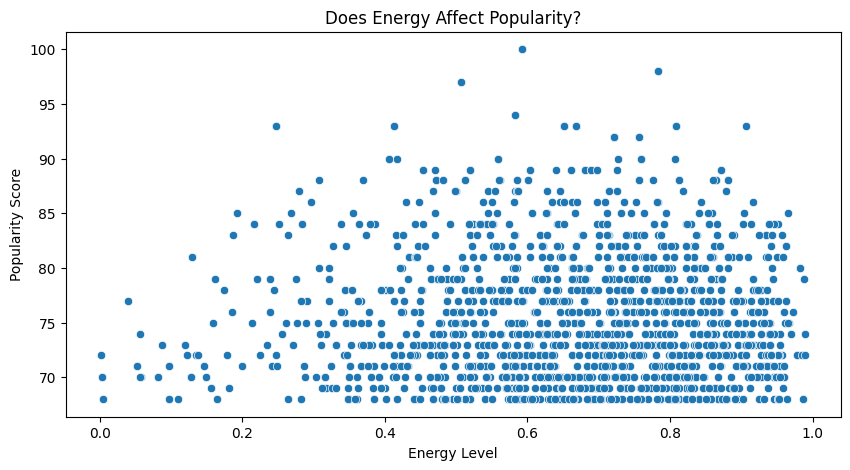

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['energy'], y=df['track_popularity'])
plt.title("Does Energy Affect Popularity?")
plt.xlabel("Energy Level")
plt.ylabel("Popularity Score")
plt.show()

# Popularity Based on Tempo

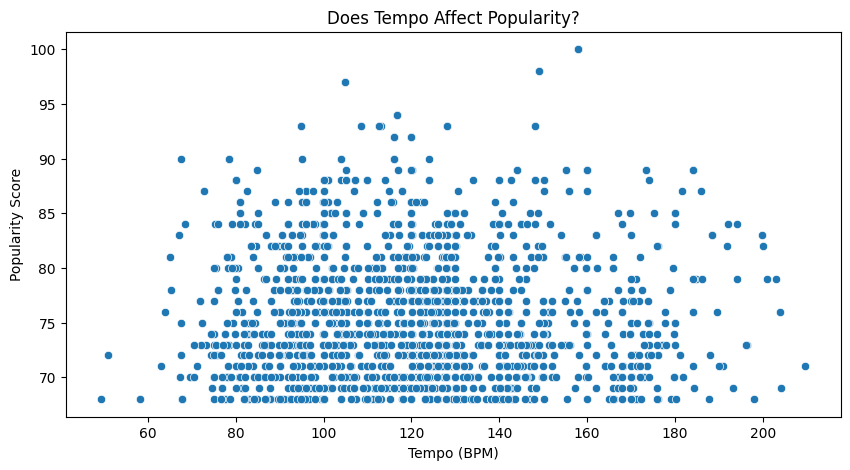

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=df['tempo'], y=df['track_popularity'])
plt.title("Does Tempo Affect Popularity?")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Popularity Score")
plt.show()


# Popularity Based on Loudness

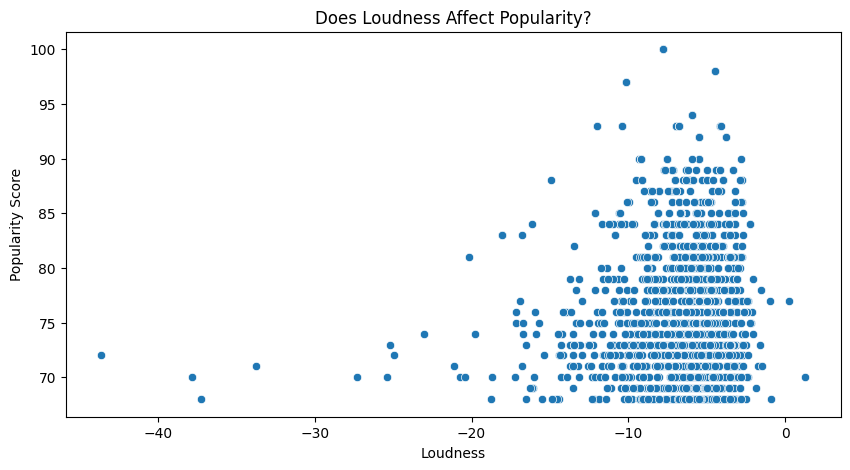

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['loudness'], y=df['track_popularity'])
plt.title("Does Loudness Affect Popularity?")
plt.xlabel("Loudness")
plt.ylabel("Popularity Score")
plt.show()

# Popularity Based on Danceability

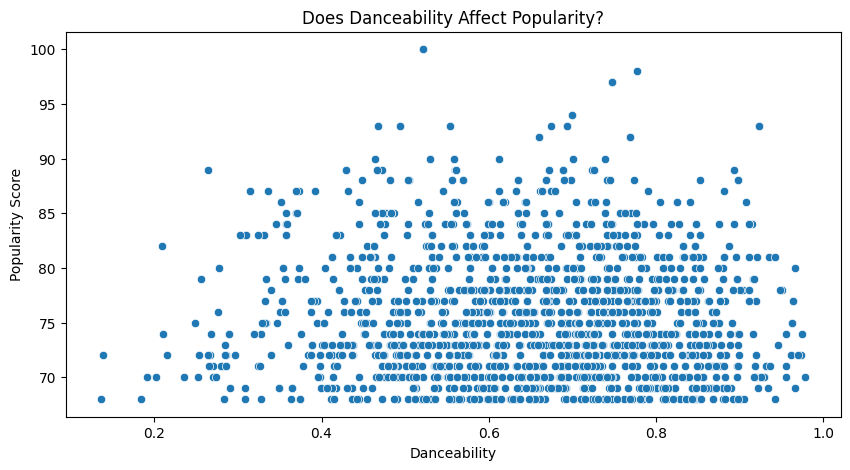

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['danceability'], y=df['track_popularity'])
plt.title("Does Danceability Affect Popularity?")
plt.xlabel("Danceability")
plt.ylabel("Popularity Score")
plt.show()

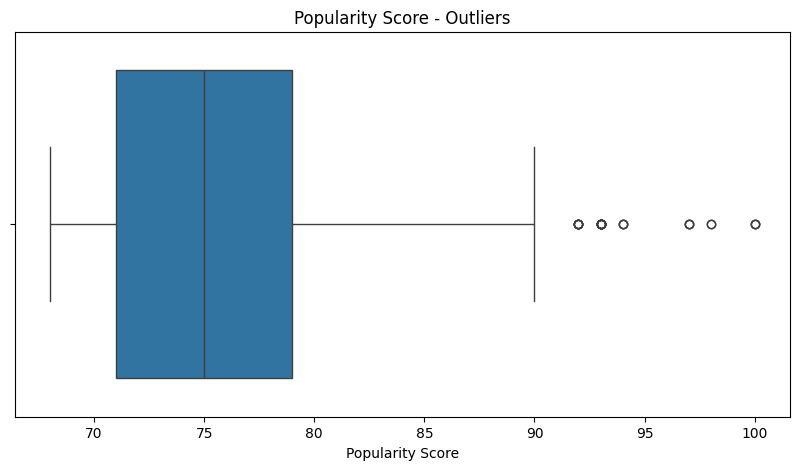

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x=df["track_popularity"])
plt.title("Popularity Score - Outliers")  # Add title
plt.xlabel("Popularity Score")  # Label for X-axis
plt.show()

Mean Absolute Error: 3.91
R² Score: 0.29


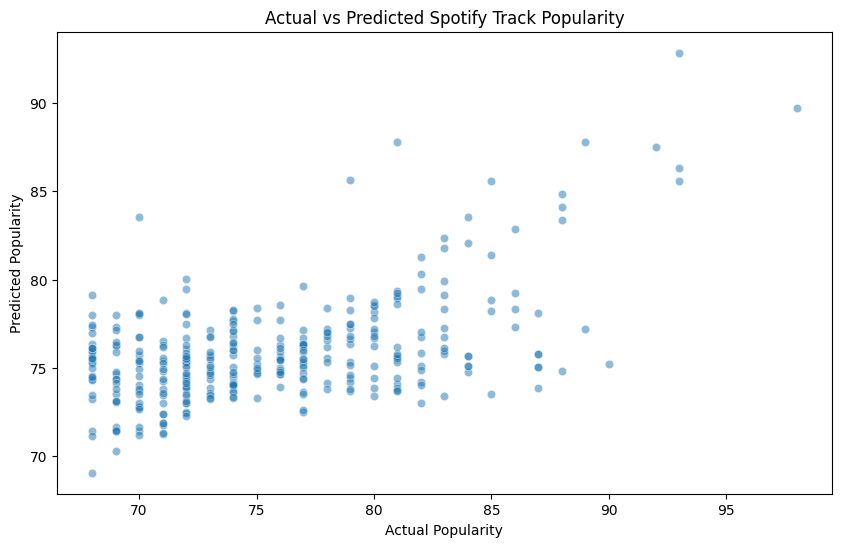

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'track_popularity'

X = df[features]
y = df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Spotify Track Popularity")
plt.show()



In [37]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Load & train model
@st.cache_resource
def load_model():
    df = pd.read_csv("high_popularity_spotify_data.csv")
    features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'valence', 'tempo']
    X = df[features]
    y = df["track_popularity"]
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    return model, df, features

model, df, features = load_model()

# App layout
st.title(" Spotify Song Popularity Predictor")
st.write("Predict how popular your song might be based on its audio features!")

# Sidebar input
st.sidebar.header(" Tune Song Features")

# Sliders in sections
st.sidebar.subheader(" Rhythm & Dynamics")
danceability = st.sidebar.slider("Danceability", 0.0, 1.0, 0.5)
energy = st.sidebar.slider("Energy", 0.0, 1.0, 0.5)
loudness = st.sidebar.slider("Loudness", -60.0, 0.0, -10.0)
tempo = st.sidebar.slider("Tempo", 40.0, 220.0, 120.0)

st.sidebar.subheader(" Vocal & Instrumental")
speechiness = st.sidebar.slider("Speechiness", 0.0, 1.0, 0.1)
instrumentalness = st.sidebar.slider("Instrumentalness", 0.0, 1.0, 0.0)
acousticness = st.sidebar.slider("Acousticness", 0.0, 1.0, 0.3)

st.sidebar.subheader(" Mood & Ambience")
liveness = st.sidebar.slider("Liveness", 0.0, 1.0, 0.1)
valence = st.sidebar.slider("Valence", 0.0, 1.0, 0.5)

# Prediction
input_data = np.array([[danceability, energy, loudness, speechiness, acousticness,
                        instrumentalness, liveness, valence, tempo]])
predicted_popularity = model.predict(input_data)[0]

st.markdown(f"###  Predicted Popularity Score: **{predicted_popularity:.2f}/100**")

if predicted_popularity > 75:
    st.success(" This one's a banger!")
elif predicted_popularity > 50:
    st.info(" Might just be a hidden gem.")
else:
    st.warning(" Could be niche or experimental...")

# Optional: Feature Importance
st.subheader(" Feature Importance (from the model)")
importances = model.feature_importances_
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
st.bar_chart(importance_df.set_index("Feature"))

2025-03-28 00:38:37.306 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 00:38:37.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 00:38:37.308 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 00:38:37.308 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 00:38:37.309 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 00:38:37.309 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 00:38:37.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 00:38:37.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

# Pinpoint Popularity Based on Outliers

## Conclusion: Key Findings from Spotify Data Analysis  

### Popularity Distribution  
- The histogram shows that most songs have a popularity score between 65 and 80.  
- There are fewer songs with extreme popularity (90+), meaning viral hits are rare.  
- Apeak around 70 suggests that many songs struggle to gain higher popularity.  
- Some outliers above 95 indicate massive hits, likely from famous artists or trending songs.  

### Tempo  
- The scatter plot suggests that mid-tempo songs (100-140 BPM) are more common in top rankings.  
- However, there is no strong direct correlation between tempo and popularity.  

### Energy
- High-energy songs are more likely to be in the top popularity range.  
- Songs with higher energy scores tend to perform better, but energy alone does not guarantee popularity.  

### Danceability  
- Danceability measures how suitable a song is for dancing (ranges from 0 to 1).  
- Most popular songs have a danceability score between 0.5 and 0.9, meaning they have a strong beat and rhythm.  
- However, some low-danceability songs are still popular, suggesting that danceability alone does not determine success.  

### Loudness
- Loudness measures the volume level of a song in decibels (dB).  
- Most popular songs range between -10 dB and 0 dB, meaning louder songs tend to perform better.  
- Softer songs (below -20 dB) rarely reach high popularity, suggesting that loud songs dominate mainstream charts.  

### Genre
- Pop is the most popular genre, followed by **R&B, Soul, and K-Pop**. 
- Latin, Rock, and Hip-Hop also rank high, showing a strong global appeal.  
- Jazz, Country, and Classical have lower popularity scores, meaning they are less mainstream compared to other genres.  
- **"Gaming" was removed from the dataset** as it was a category, not a genre.  


### Outliers & Viral Hits  
- Some songs have extreme popularity (above 95), likely viral hits.  
- These songs might be trending, part of a movie soundtrack, or from globally famous artists.  

---

## Next Steps & Future Improvements  
- Building on the machine learning model to predict song popularity based on features like energy, danceability, and loudness.

- Expanding the interactive dashboard for deeper user exploration of trends.

- Analyzing lyrical content vs. popularity (Do sad or happy songs trend more?).

- Integrating audio playback for selected tracks.
